In [1]:
!pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정

In [4]:
train_df = pd.read_csv('./train.csv')

test_df = pd.read_csv('./test.csv')

In [5]:
train_x = train_df.drop(columns = ['PRODUCT_ID','Y_Quality','Y_Class'])
train_y = train_df['Y_Class']
test_x = test_df.drop(columns = ['PRODUCT_ID'])

In [6]:
train_x['TIMESTAMP'].dtype

dtype('O')

In [7]:
train_x['TIMESTAMP'] = pd.to_datetime(train_x['TIMESTAMP'])
test_x['TIMESTAMP'] =pd.to_datetime(test_x['TIMESTAMP'])

In [8]:
train_x['TIME'] = train_x['TIMESTAMP'].dt.hour
test_x['TIME'] = test_x['TIMESTAMP'].dt.hour

In [9]:
train_x = train_x.drop(columns = ['TIMESTAMP'])
test_x = test_x.drop(columns = ['TIMESTAMP'])

In [10]:
train_x

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,TIME
0,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN,5
1,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN,5
2,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN,5
3,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN,5
4,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,50.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
594,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN,22
595,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,22
596,T100304,O_31,40.0,94.0,0.0,45.0,11.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


In [11]:
train_x['TIME'] = train_x['TIME'].apply(lambda x: str(x).zfill(2))
test_x['TIME']= test_x['TIME'].apply(lambda x: str(x).zfill(2))
train_x.fillna("0", inplace = True)
test_x.fillna("0", inplace = True)
train_x

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,TIME
0,T050304,A_31,0,0,0,0,0,0,0,0,...,40.89,32.56,34.09,77.77,0,0,0,0,0,05
1,T050307,A_31,0,0,0,0,0,0,0,0,...,42.82,43.92,35.34,72.55,0,0,0,0,0,05
2,T050304,A_31,0,0,0,0,0,0,0,0,...,36.65,42.47,36.53,78.35,0,0,0,0,0,05
3,T050307,A_31,0,0,0,0,0,0,0,0,...,39.17,52.17,30.58,71.78,0,0,0,0,0,05
4,T050304,A_31,0,0,0,0,0,0,0,0,...,41.89,46.93,33.09,76.97,0,0,0,0,0,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,50.0,10.0,...,0,0,0,0,0,0,0,0,0,14
594,T050304,A_31,0,0,0,0,0,0,0,0,...,53.07,50.89,55.1,66.49,1.0,0,0,0,0,22
595,T050304,A_31,0,0,0,0,0,0,0,0,...,0,0,0,0,1.0,0,0,0,0,22
596,T100304,O_31,40.0,94.0,0.0,45.0,11.0,0.0,45.0,10.0,...,0,0,0,0,0,0,0,0,0,14


In [12]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE','TIME']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 

In [13]:
train_x

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,TIME
0,2,0,0,0,0,0,0,0,0,0,...,40.89,32.56,34.09,77.77,0,0,0,0,0,5
1,3,0,0,0,0,0,0,0,0,0,...,42.82,43.92,35.34,72.55,0,0,0,0,0,5
2,2,0,0,0,0,0,0,0,0,0,...,36.65,42.47,36.53,78.35,0,0,0,0,0,5
3,3,0,0,0,0,0,0,0,0,0,...,39.17,52.17,30.58,71.78,0,0,0,0,0,5
4,2,0,0,0,0,0,0,0,0,0,...,41.89,46.93,33.09,76.97,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,5,2,2.0,95.0,0.0,45.0,10.0,0.0,50.0,10.0,...,0,0,0,0,0,0,0,0,0,14
594,2,0,0,0,0,0,0,0,0,0,...,53.07,50.89,55.1,66.49,1.0,0,0,0,0,22
595,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.0,0,0,0,0,22
596,4,1,40.0,94.0,0.0,45.0,11.0,0.0,45.0,10.0,...,0,0,0,0,0,0,0,0,0,14


In [14]:
train_y.value_counts()

1    407
2    103
0     88
Name: Y_Class, dtype: int64

<AxesSubplot: xlabel='Y_Class', ylabel='count'>

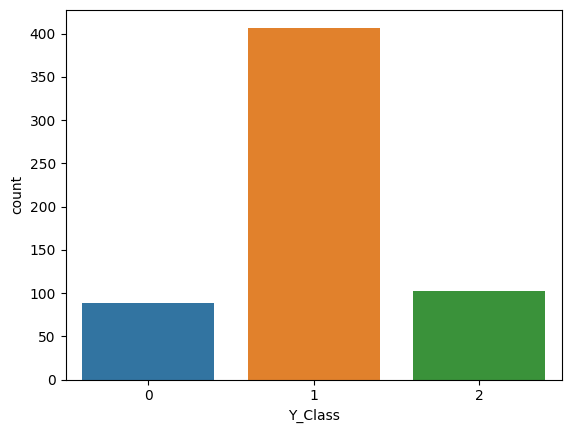

In [15]:
sns.countplot(x= train_y)

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

f1_history = []
accuracy_history = []

smote = SMOTE(random_state=37)
X_smote, y_smote = smote.fit_resample(train_x,train_y)

model = RandomForestClassifier(n_estimators=600,
                               max_depth = 3,
                               min_samples_split=3,
                               min_samples_leaf=1,
                               random_state=37) # 모델 선언
model.fit(X_smote, y_smote) # 모델 학습

y_pred = model.predict(test_x) # 예측 라벨


In [22]:
submit = pd.read_csv('./sample_submission.csv')

In [23]:
submit['Y_Class'] = y_pred

In [24]:
submit.to_csv('./smote_depth3_2_submission.csv', index=False)